# Random Forest

## Inizializzazione variabili

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
import matplotlib.pyplot as plt

# Percorso dove salvare l'excel
excel_path = "Excel/Bilanciamento/RandomForest_Results_Bilanced_complicanze.xlsx"

In [115]:
# Genera il dataset
parte1 = pd.read_csv("Parte1_classificato.csv")
parte2 = pd.read_csv("Excel/parte2_v1.csv")

# Viene rinominata la feature ID in Patiene_ID per perettere il merge
parte2 = parte2.rename(columns={"ID": "Patient_ID"})
parte2 = parte2.drop(columns=["Complicanze"])


# Viene fatto un inner‐merge su Patient_ID:
df = parte1.merge(parte2, on="Patient_ID", how="inner")
df = df.drop(columns=["Patient_ID"])

# Dividi X e Y
Y = df['TipoComplicanza']
X = df.drop(columns=['TipoComplicanza'])

In [4]:
# Funzione per metriche
def get_metrics(y_true, y_predicted):
    matrix = confusion_matrix(y_true, y_predicted)
    accuracy = accuracy_score(y_true, y_predicted)
    precision = precision_score(y_true, y_predicted, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_predicted, average='weighted', zero_division=0)
    f1score = f1_score(y_true, y_predicted, average='weighted', zero_division=0)
    return matrix, accuracy, precision, recall, f1score

### Riempimento valori null con la media

In [688]:
df_media = df.fillna(df.mean(numeric_only=True))

# Dividi X e Y
del X, Y
Y = df_media['TipoComplicanza']
X = df_media.drop(columns=['TipoComplicanza'])

### Riempimento valori null con la mediana

In [705]:
df_mediana = df.fillna(df.median(numeric_only=True))

# Dividi X e Y
del X, Y
Y = df_mediana['TipoComplicanza']
X = df_mediana.drop(columns=['TipoComplicanza'])

### Riempimento valori null con KNNImputer

In [722]:
# Rimuovi momentaneamente X e Y
df_temp = df.copy()

# Crea un imputatore KNN
imputer = KNNImputer( (con ))

# Applica l'imputazione solo sulle colonne numeriche
df_imputed_array = imputer.fit_transform(df_temp.select_dtypes(include='number'))

# Ricrea il DataFrame con le stesse colonne
df_imputed = pd.DataFrame(df_imputed_array, columns=df_temp.select_dtypes(include='number').columns)

# Se ci sono colonne non numeriche, le aggiungiamo di nuovo (senza modificarle)
for col in df_temp.columns:
    if col not in df_imputed.columns:
        df_imputed[col] = df_temp[col]

# Dividi X e Y
del X, Y
Y = df_imputed['TipoComplicanza']
X = df_imputed.drop(columns=['TipoComplicanza'])

### Riempimento valori null con IterativeImputer

In [105]:
# Rimuovi momentaneamente X e Y
df_temp = df.copy()

# Crea un imputatore iterativo
imputer = IterativeImputer(max_iter=100, random_state=42)

# Applica l'imputazione solo sulle colonne numeriche
df_imputed_array = imputer.fit_transform(df_temp.select_dtypes(include='number'))

# Ricrea il DataFrame con le stesse colonne
df_imputed = pd.DataFrame(df_imputed_array, columns=df_temp.select_dtypes(include='number').columns)

# Se ci sono colonne non numeriche, le aggiungiamo di nuovo (senza modificarle)
for col in df_temp.columns:
    if col not in df_imputed.columns:
        df_imputed[col] = df_temp[col]

# Dividi X e Y
del X, Y
Y = df_imputed['TipoComplicanza']
X = df_imputed.drop(columns=['TipoComplicanza'])

KeyError: 'TipoComplicanza'

In [6]:
Prova = 80
n_estimators = 300
max_depth = 10

## Metodo dell 80/20

=== VALIDAZIONE 80/20 ===


C:\Users\gabry\AppData\Local\Temp\ipykernel_25580\1401923231.py:155: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gabry\PycharmProjects\Visione_Artificiale_e_Biometria\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


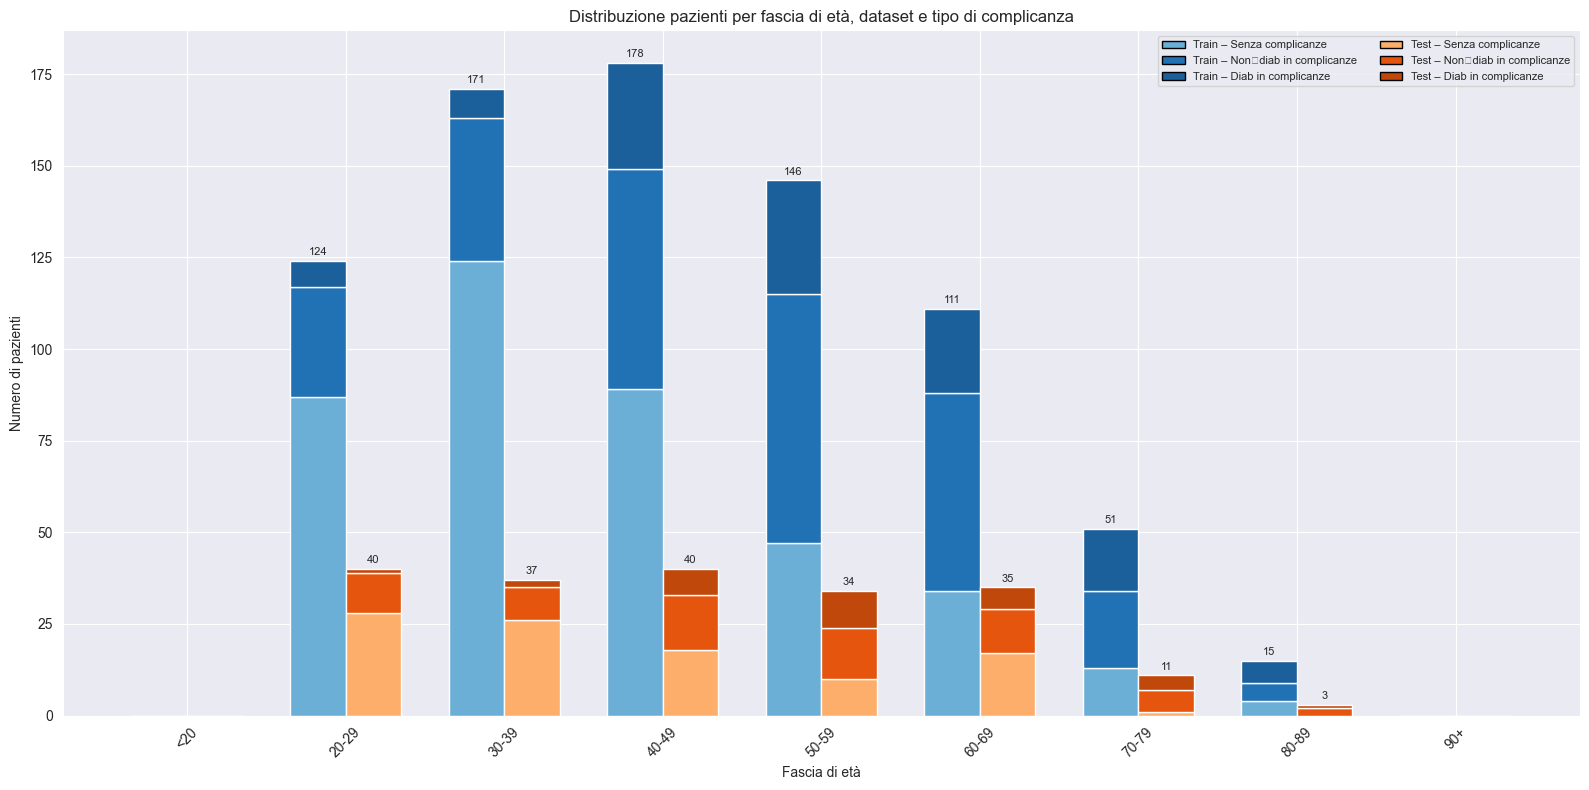

FileNotFoundError: [Errno 2] No such file or directory: 'Excel/Bilanciamento/RandomForest_Results_Bilanced_complicanze111.xlsx'

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== VALIDAZIONE 80/20 ===")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm, acc, prec, rec, f1 = get_metrics(y_test, y_pred)

#print(f"Accuracy: {acc:.4f}")
#print(f"Precision: {prec:.4f}")
#print(f"Recall: {rec:.4f}")
#print(f"F1-Score: {f1:.4f}")

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot(cmap=plt.cm.Blues)
#plt.title("Confusion Matrix 80/20")
#plt.show()

# Calcola importanza delle feature
importances = clf.feature_importances_
features = X.columns
importances_dict = {f'Imp_{feat}': [imp] for feat, imp in zip(features, importances)}

# Prepara il DataFrame da salvare
df_split = pd.DataFrame({
    'Prova': [Prova],
    'n_estimators': [n_estimators],
    'max_depth': [max_depth],
    'Accuracy': [acc],
    'Precision': [prec],
    'Recall': [rec],
    'F1-Score': [f1],
    'Confusion_Matrix': [cm.tolist()],
    ' ': [None]
} | importances_dict)  # Unione dizionari

# Aggiungi a eventuali dati già presenti
if os.path.exists(excel_path):
    with pd.ExcelFile(excel_path) as reader:
        if 'Split_80_20' in reader.sheet_names:
            prev_data = pd.read_excel(reader, sheet_name='Split_80_20')
            df_split = pd.concat([prev_data, df_split], ignore_index=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Funzione fasce di età ---
def assign_age_group(age):
    if age < 20:  return '<20'
    elif age < 30: return '20-29'
    elif age < 40: return '30-39'
    elif age < 50: return '40-49'
    elif age < 60: return '50-59'
    elif age < 70: return '60-69'
    elif age < 80: return '70-79'
    elif age < 90: return '80-89'
    else:          return '90+'

# --- Prepara i frame Train/Test ---
train_df = X_train.copy()
train_df['TipoComplicanza'] = y_train
train_df['Dataset'] = 'Train'
train_df['age_group'] = train_df['Age'].apply(assign_age_group)

test_df  = X_test.copy()
test_df['TipoComplicanza'] = y_test
test_df['Dataset'] = 'Test'
test_df['age_group']  = test_df['Age'].apply(assign_age_group)

full_df   = pd.concat([train_df, test_df], ignore_index=True)
age_order = ['<20','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+']

# --- Conta i casi per fascia, dataset e tipo compl ---
groups = (
    full_df
    .groupby(['age_group','Dataset','TipoComplicanza'])
    .size()
    .unstack(fill_value=0)
)

# --- Impostazioni grafico ---
fig, ax = plt.subplots(figsize=(16,8))
x         = np.arange(len(age_order))
bar_width = 0.35

colors = {
    ('Train', 0): '#6baed6', 
    ('Train', 1): '#2171b5',
    ('Train', 2): '#1c609b',
    ('Test',  0): '#fdae6b',
    ('Test',  1): '#e6550d',
    ('Test',  2): '#c1480b',
}

offsets = {'Train': -bar_width/2, 'Test': +bar_width/2}

# --- Disegna barre impilate per ciascun dataset e tipo ---
for dataset in ('Train','Test'):
    bottoms = np.zeros(len(age_order))
    xi = x + offsets[dataset]
    for comp in (0,1,2):
        vals = [
            groups.loc[(age, dataset), comp] 
            if (age, dataset) in groups.index else 0
            for age in age_order
        ]
        ax.bar(xi, vals, bar_width, bottom=bottoms,
               color=colors[(dataset,comp)],
               label=f"{dataset} – {['Senza','Non‑diab','Diab'][comp]}" if dataset=='Train' else None)
        bottoms += np.array(vals)

# --- Annotazioni totali sopra le barre ---
for dataset in ('Train','Test'):
    xi = x + offsets[dataset]
    # somma i tre segmenti
    no  = [groups.loc[(age, dataset), 0] if (age, dataset) in groups.index else 0 for age in age_order]
    n1  = [groups.loc[(age, dataset), 1] if (age, dataset) in groups.index else 0 for age in age_order]
    n2  = [groups.loc[(age, dataset), 2] if (age, dataset) in groups.index else 0 for age in age_order]
    total = np.array(no) + np.array(n1) + np.array(n2)
    for xj, t in zip(xi, total):
        if t > 0:
            ax.text(xj, t + 1, str(int(t)), ha='center', va='bottom', fontsize=8)

# --- Finiture ---
ax.set_xticks(x)
ax.set_xticklabels(age_order, rotation=45)
ax.set_xlabel('Fascia di età')
ax.set_ylabel('Numero di pazienti')
ax.set_title('Distribuzione pazienti per fascia di età, dataset e tipo di complicanza')

# Legenda: mostro solo i tre segmenti (Senza/Non‑diab/Diab)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# --- Costruzione legenda completa Train/Test × 3 complicanze ---
legend_handles = []
labels = ['Senza complicanze', 'Non‑diab in complicanze', 'Diab in complicanze']

for dataset in ('Train','Test'):
    for comp in (0,1,2):
        color = colors[(dataset, comp)]
        legend_handles.append(
            Patch(facecolor=color, edgecolor='k',
                  label=f"{dataset} – {labels[comp]}")
        )

ax.legend(handles=legend_handles, loc='upper right', ncol=2, fontsize=8, frameon=True)

plt.tight_layout()
plt.show()


# Salvataggio Excel (se serve)
with pd.ExcelWriter(excel_path, mode='a', engine='openpyxl',
                    if_sheet_exists='replace') as writer:
    full_df.to_excel(writer, sheet_name='Split_80_20', index=False)

print("✅ Risultati 80/20 salvati su Excel.")

## K-Fold cross recognition

=== VALIDAZIONE K-FOLD ===


C:\Users\gabry\AppData\Local\Temp\ipykernel_25580\3452503315.py:144: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gabry\PycharmProjects\Visione_Artificiale_e_Biometria\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


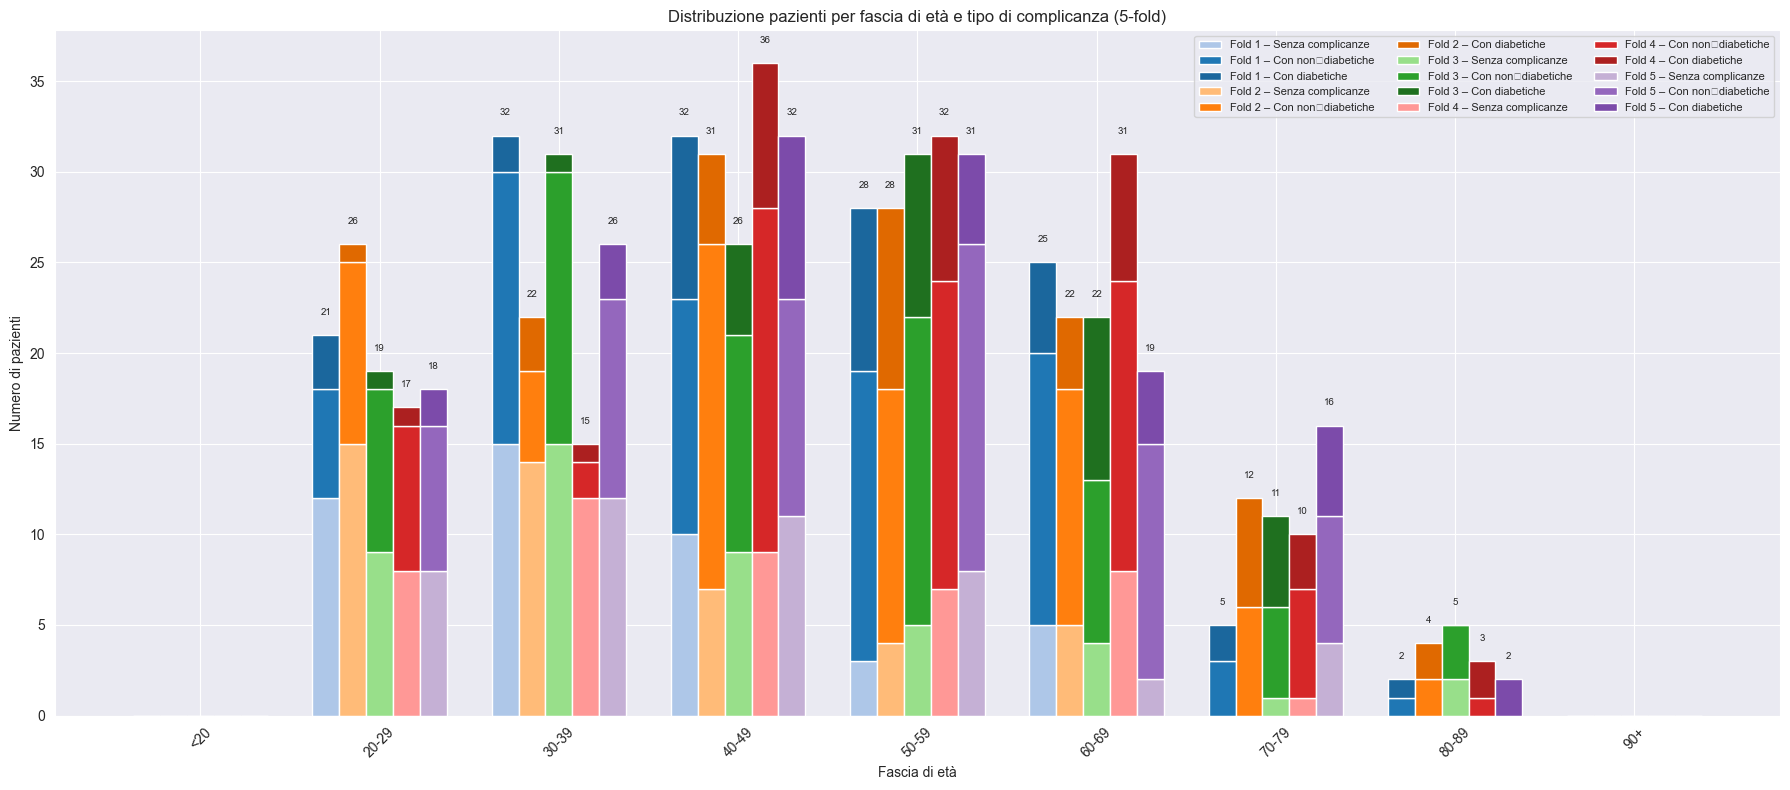

FileNotFoundError: [Errno 2] No such file or directory: 'Excel/Bilanciamento/RandomForest_Results_Bilanced_complicanze111.xlsx'

In [86]:
print("=== VALIDAZIONE K-FOLD ===")

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []

for i, (train_index, test_index) in enumerate(kf.split(X, Y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    cm, acc, prec, rec, f1 = get_metrics(y_test, y_pred)

#    print(f"\n--- Fold {i} ---")
#    print(f"Accuracy: {acc:.4f}")
#    print(f"Precision: {prec:.4f}")
#    print(f"Recall: {rec:.4f}")
#    print(f"F1-Score: {f1:.4f}")

#    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#    disp.plot(cmap=plt.cm.Blues)
#    plt.title(f"Confusion Matrix Fold {i}")
#    plt.show()

    # Calcola importanza delle feature
    importances = clf.feature_importances_
    features = X.columns
    importances_dict = {f'Imp_{feat}': imp for feat, imp in zip(features, importances)}

    # Salva tutti i dati in un'unica riga
    fold_results.append({
        'Prova': Prova,
        'KFold' : i,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Confusion_Matrix': cm.tolist(),
        ' ': None,  # cella vuota per separare le metriche dalle importances
        **importances_dict
    })

df_kfold = pd.DataFrame(fold_results)

# Aggiungi a eventuali dati già presenti
if os.path.exists(excel_path):
    with pd.ExcelFile(excel_path) as reader:
        if 'KFold_CV' in reader.sheet_names:
            prev_kfold = pd.read_excel(reader, sheet_name='KFold_CV')
            df_kfold = pd.concat([prev_kfold, df_kfold], ignore_index=True)
            
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
from sklearn.model_selection import StratifiedKFold

# --- Funzione fasce d’età ---
def assign_age_group(age):
    if age < 20:   return '<20'
    elif age < 30: return '20-29'
    elif age < 40: return '30-39'
    elif age < 50: return '40-49'
    elif age < 60: return '50-59'
    elif age < 70: return '60-69'
    elif age < 80: return '70-79'
    elif age < 90: return '80-89'
    else:          return '90+'

# --- Raccogli dati da tutti i folds ---
all_folds_data = []
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X, Y), start=1):
    split_df = X.iloc[test_idx].copy()
    split_df['TipoComplicanza'] = Y.iloc[test_idx]
    split_df['Fold'] = fold
    all_folds_data.append(split_df)

full_df = pd.concat(all_folds_data, ignore_index=True)
full_df['age_group'] = full_df['Age'].apply(assign_age_group)

# --- Prepara il conteggio ---
age_order = ['<20','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+']
groups = (full_df
          .groupby(['age_group','Fold','TipoComplicanza'])
          .size()
          .unstack(fill_value=0)
         )

# --- Palette colori: (comp0, comp1, comp2) per ogni fold 1–5 ---
color_map = {
    1: ('#aec7e8', '#1f77b4', '#1B679D'),  # chiaro, medio, scuro blu
    2: ('#ffbb78', '#ff7f0e', '#E06900'),  # chiaro, medio, scuro arancio
    3: ('#98df8a', '#2ca02c', '#1F701F'),  # chiaro, medio, scuro verde
    4: ('#ff9896', '#d62728', '#AC2020'),  # chiaro, medio, scuro rosso
    5: ('#c5b0d5', '#9467bd', '#7C4BAA'),  # chiaro, medio, scuro viola
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(18, 8))
bar_width = 0.15
x = np.arange(len(age_order))
offsets = {fold: (fold-3) * bar_width for fold in range(1, 6)}

# Disegna le barre impilate per ciascun fold
for fold in range(1, 6):
    xi = x + offsets[fold]
    bottoms = np.zeros(len(age_order))
    for comp in (0, 1, 2):
        # estrai valori per fascia e fold
        vals = [
            groups.loc[(age, fold), comp] 
            if (age, fold) in groups.index else 0
            for age in age_order
        ]
        ax.bar(xi, vals, bar_width, bottom=bottoms,
               color=color_map[fold][comp],
               label=f"Fold {fold} – {['Senza complicanze','Con non‑diabetiche','Con diabetiche'][comp]}")
        bottoms += np.array(vals)

    # annotazioni totali
    total = bottoms
    for xj, t in zip(xi, total):
        if t > 0:
            ax.text(xj, t + 1, str(int(t)), ha='center', va='bottom', fontsize=7)

# Finiture
ax.set_xticks(x)
ax.set_xticklabels(age_order, rotation=45)
ax.set_xlabel('Fascia di età')
ax.set_ylabel('Numero di pazienti')
ax.set_title('Distribuzione pazienti per fascia di età e tipo di complicanza (5-fold)')

# Legenda completa senza duplicati
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', ncol=3, fontsize=8, frameon=True)

plt.tight_layout()
plt.show()



# Scrivi sul file
with pd.ExcelWriter(excel_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_kfold.to_excel(writer, sheet_name='KFold_CV', index=False)

print("✅ Risultati K-Fold salvati su Excel.")

## TRAIN-FOLD / TEST-HOLDOUT validation

=== VALIDAZIONE TRAIN-FOLD / TEST-HOLDOUT ===


C:\Users\gabry\AppData\Local\Temp\ipykernel_25580\2465117537.py:170: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gabry\PycharmProjects\Visione_Artificiale_e_Biometria\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


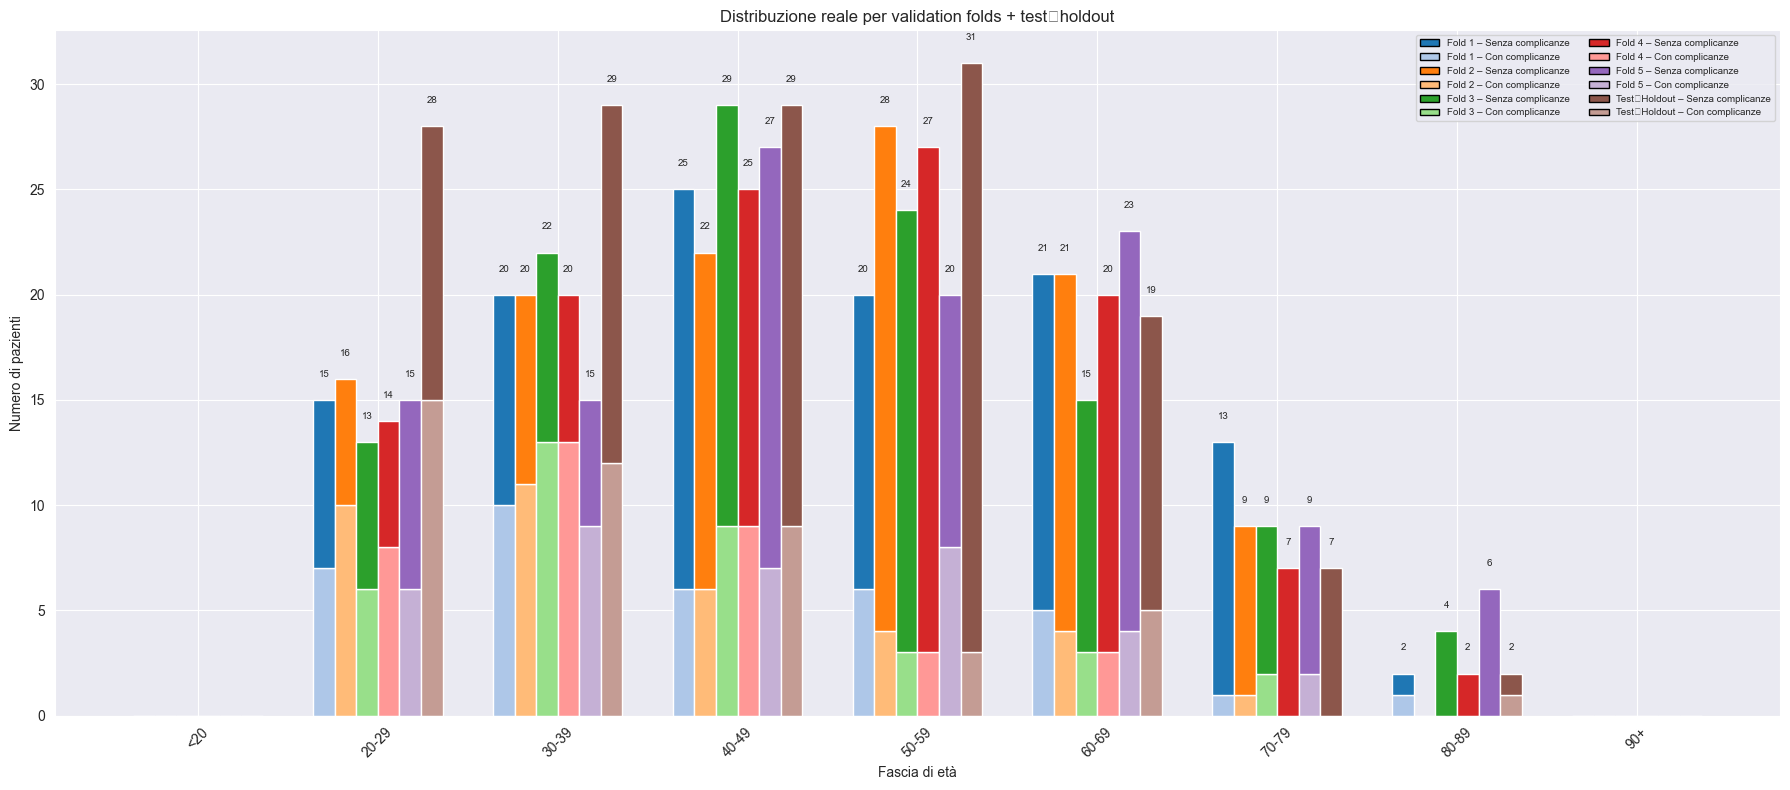

FileNotFoundError: [Errno 2] No such file or directory: 'Excel/Bilanciamento/RandomForest_Results_Bilanced_complicanze111.xlsx'

In [90]:
print("=== VALIDAZIONE TRAIN-FOLD / TEST-HOLDOUT ===")
val_results = []
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

for i, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
    X_fold_train = X_train.iloc[train_idx]
    y_fold_train = y_train.iloc[train_idx]

    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    clf.fit(X_fold_train, y_fold_train)

    # Si testa sempre sullo stesso 20%
    y_pred = clf.predict(X_test)

    cm, acc, prec, rec, f1 = get_metrics(y_test, y_pred)

#    print(f"\n--- Fold {i} (train su fold, test fisso) ---")
#    print(f"Accuracy: {acc:.4f}")
#    print(f"Precision: {prec:.4f}")
#    print(f"Recall: {rec:.4f}")
#    print(f"F1-Score: {f1:.4f}")

#    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#    disp.plot(cmap=plt.cm.Blues)
#    plt.title(f"Confusion Matrix Fold {i}")
#    plt.show()

    # Feature importances
    importances = clf.feature_importances_
    importances_dict = {f'Imp_{feat}': imp for feat, imp in zip(X.columns, importances)}

    # Salva i risultati del fold
    val_results.append({
        'Prova': Prova,
        'KFold' : i,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Confusion_Matrix': cm.tolist(),
        ' ': None,  # cella vuota per separare le metriche dalle importances
        **importances_dict
    })

# Crea il DataFrame
df_nested = pd.DataFrame(val_results)

# Se esiste già, aggiungi i dati al foglio
if os.path.exists(excel_path):
    with pd.ExcelFile(excel_path) as reader:
        if 'TrainFold_TestFixed' in reader.sheet_names:
            prev_nested = pd.read_excel(reader, sheet_name='TrainFold_TestFixed')
            df_nested = pd.concat([prev_nested, df_nested], ignore_index=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib.patches import Patch

# --- Parametri ---
n_splits    = 5
random_state= 42
n_estimators= 100
max_depth   = None

# --- Funzione per fasce di età ---
def assign_age_group(age):
    if age < 20:  return '<20'
    if age < 30:  return '20-29'
    if age < 40:  return '30-39'
    if age < 50:  return '40-49'
    if age < 60:  return '50-59'
    if age < 70:  return '60-69'
    if age < 80:  return '70-79'
    if age < 90:  return '80-89'
    return '90+'

# --- 1) Split train / test holdout ---
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=random_state
)

# Preparo la riga Test‐Holdout (vera distribuzione del 20%)
all_splits = []
test_df = X_test.copy()
test_df['TipoComplicanza'] = y_test
test_df['Fold'] = 'Test‐Holdout'
all_splits.append(test_df)

# --- 2) Stratified K‑Fold sui rimanenti 80% ---
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
    X_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]

    # prendo **la vera distribuzione** della validation
    fold_df = X_val.copy()
    fold_df['TipoComplicanza'] = y_val
    fold_df['Fold'] = f"Fold {fold}"
    all_splits.append(fold_df)

# --- 3) Combino e ricavo le fasce d’età ---
full_df = pd.concat(all_splits, ignore_index=True)
full_df['age_group'] = full_df['Age'].apply(assign_age_group)

age_order = ['<20','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+']

groups = (
    full_df
    .groupby(['age_group','TipoComplicanza','Fold'])
    .size()
    .unstack(fill_value=0)
)

# --- 4) Palette + posizionamento colonne ---
color_map = {
    "Fold 1":     ('#1f77b4','#aec7e8'),
    "Fold 2":     ('#ff7f0e','#ffbb78'),
    "Fold 3":     ('#2ca02c','#98df8a'),
    "Fold 4":     ('#d62728','#ff9896'),
    "Fold 5":     ('#9467bd','#c5b0d5'),
    "Test‐Holdout":('#8c564b','#c49c94'),
}

folds = ["Fold 1","Fold 2","Fold 3","Fold 4","Fold 5","Test‐Holdout"]
bar_w = 0.12
x = np.arange(len(age_order))
offsets = {f: (i - (len(folds)-1)/2) * bar_w for i,f in enumerate(folds)}

# --- 5) Disegno il grafico ---
fig, ax = plt.subplots(figsize=(18,8))

for f in folds:
    no = [groups.loc[(age,0),f] if (age,0) in groups.index else 0 for age in age_order]
    yes= [groups.loc[(age,1),f] if (age,1) in groups.index else 0 for age in age_order]
    xi = x + offsets[f]

    ax.bar(xi, no,  bar_w, color=color_map[f][1], label='_nolabel_')
    ax.bar(xi, yes, bar_w, bottom=no, color=color_map[f][0], label='_nolabel_')

    # annotazioni totali
    tot = np.array(no) + np.array(yes)
    for xj,t in zip(xi, tot):
        if t>0:
            ax.text(xj, t+1, str(int(t)), ha='center', va='bottom', fontsize=7)

# assi e legenda custom
ax.set_xticks(x)
ax.set_xticklabels(age_order, rotation=45)
ax.set_xlabel('Fascia di età')
ax.set_ylabel('Numero di pazienti')
ax.set_title('Distribuzione reale per validation folds + test‐holdout')

legend_handles = []
for f in folds:
    light, dark = color_map[f]
    legend_handles.append(
        Patch(facecolor=light, edgecolor='k', label=f'{f} – Senza complicanze')
    )
    legend_handles.append(
        Patch(facecolor=dark, edgecolor='k', label=f'{f} – Con complicanze')
    )

ax.legend(handles=legend_handles, loc='upper right', ncol=2, fontsize=7, frameon=True)

plt.tight_layout()
plt.show()

            
# Salva su Excel
with pd.ExcelWriter(excel_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_nested.to_excel(writer, sheet_name='TrainFold_TestFixed', index=False)

print("✅ Risultati nested fold salvati su Excel.")

C:\Users\gabry\AppData\Local\Temp\ipykernel_25580\105977743.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


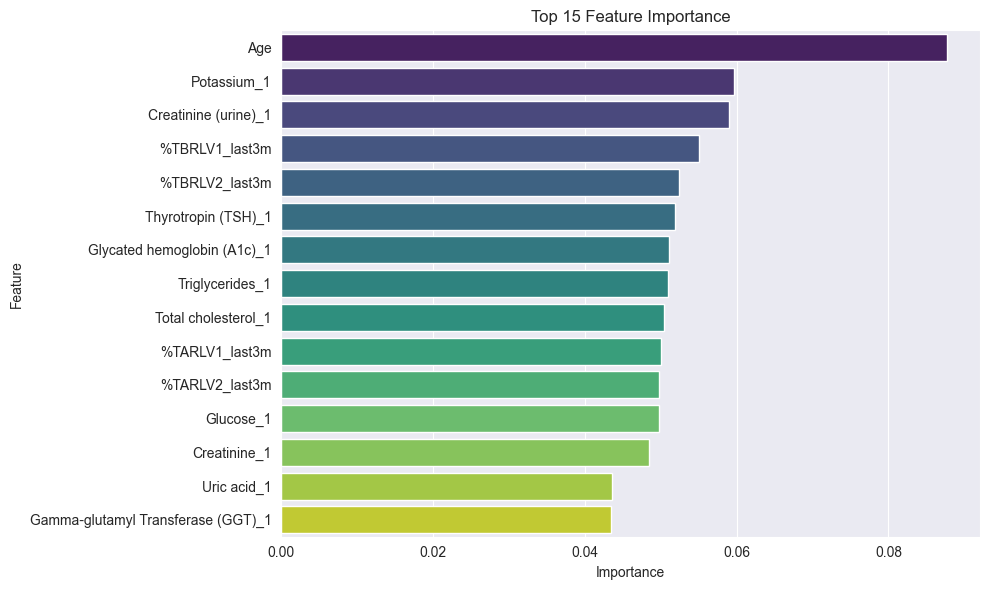


=== Feature selezionate dopo importance ===
- Age
- Potassium_1
- Creatinine (urine)_1
- %TBRLV1_last3m
- %TBRLV2_last3m
- Thyrotropin (TSH)_1
- Glycated hemoglobin (A1c)_1
- Triglycerides_1
- Total cholesterol_1
- %TARLV1_last3m
- %TARLV2_last3m


C:\Users\gabry\PycharmProjects\Visione_Artificiale_e_Biometria\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gabry\PycharmProjects\Visione_Artificiale_e_Biometria\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gabry\PycharmProjects\Visione_Artificiale_e_Biometria\.venv\Lib\site-packages\sklearn\linear_model\_l


=== Feature finali dopo RFE ===
- Age
- Potassium_1
- %TBRLV2_last3m
- Thyrotropin (TSH)_1
- Glycated hemoglobin (A1c)_1


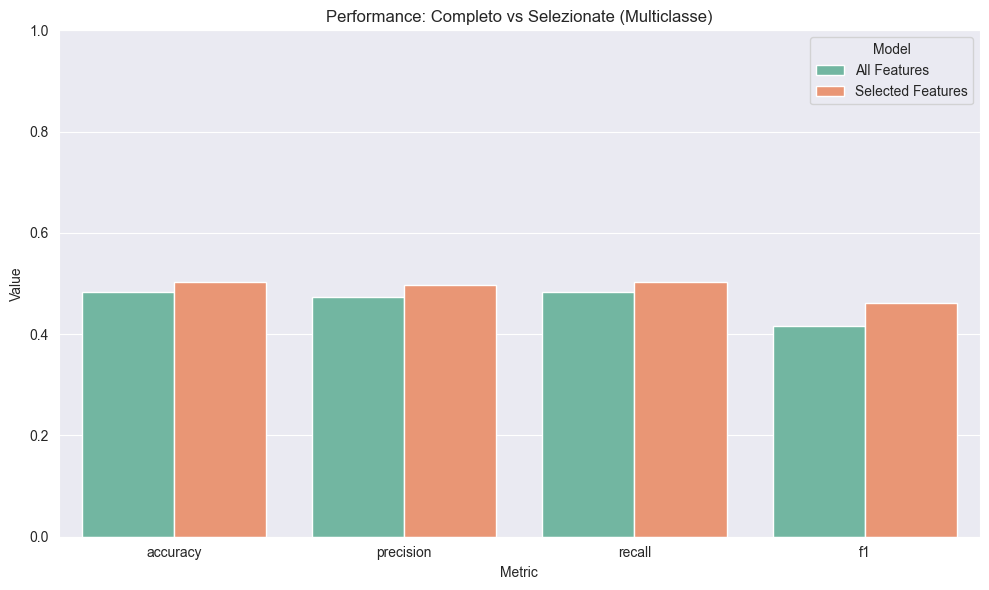


=== Report modello completo ===
                                precision    recall  f1-score   support

    con complicanze diabetiche       0.38      0.08      0.13        39
con complicanze non diabetiche       0.47      0.86      0.61        63
             senza complicanze       0.57      0.30      0.39        43

                      accuracy                           0.48       145
                     macro avg       0.47      0.41      0.38       145
                  weighted avg       0.47      0.48      0.42       145


=== Report modello selezionato ===
                                precision    recall  f1-score   support

    con complicanze diabetiche       0.44      0.18      0.25        39
con complicanze non diabetiche       0.50      0.83      0.63        63
             senza complicanze       0.54      0.33      0.41        43

                      accuracy                           0.50       145
                     macro avg       0.49      0.44      0.43 

In [113]:
# 📄 Librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import train_test_split

# ———————————————
# Mapping valori Y
label_mapping = {
    0: "senza complicanze",
    1: "con complicanze non diabetiche",
    2: "con complicanze diabetiche"
}

# ———————————————
# 1) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# ———————————————
# 2) Imputazione dei NaN (mean strategy)
imputer = SimpleImputer(strategy="mean")
X_train = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# ———————————————
# 3) Feature importance con RF
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
importance_df = (
    pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    })
    .sort_values(by='Importance', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df.head(15),
    palette="viridis"
)
plt.title('Top 15 Feature Importance')
plt.tight_layout()
plt.show()

# ———————————————
# 4) Selezione dopo importance (soglia = mediana)
threshold = np.median(importances)
important_features = importance_df[
    importance_df['Importance'] >= threshold
]['Feature'].tolist()

print("\n=== Feature selezionate dopo importance ===")
for feat in important_features:
    print(f"- {feat}")

# ———————————————
# 5) RFE sulle feature importanti
logreg = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', solver='lbfgs')
rfe = RFE(logreg, n_features_to_select=len(important_features)//2)
rfe.fit(X_train[important_features], y_train)

final_features = [
    feat for feat, keep in zip(important_features, rfe.support_) if keep
]

print("\n=== Feature finali dopo RFE ===")
for feat in final_features:
    print(f"- {feat}")

# ———————————————
# 6) Confronto performance

# Modello con tutte le feature
rf_full = RandomForestClassifier(random_state=42)
rf_full.fit(X_train, y_train)
y_pred_full = rf_full.predict(X_test)

# Modello con feature selezionate
rf_sel = RandomForestClassifier(random_state=42)
rf_sel.fit(X_train[final_features], y_train)
y_pred_sel = rf_sel.predict(X_test[final_features])

# Per multi-class: aggiungo average='weighted'
metrics = {
    'accuracy': accuracy_score,
    'precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted', zero_division=0),
    'recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted', zero_division=0),
    'f1': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted', zero_division=0),
}

results = {'Metric': [], 'Model': [], 'Value': []}
for name, func in metrics.items():
    val_full = func(y_test, y_pred_full)
    val_sel = func(y_test, y_pred_sel)
    results['Metric'] += [name, name]
    results['Model'] += ['All Features', 'Selected Features']
    results['Value'] += [val_full, val_sel]

results_df = pd.DataFrame(results)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Metric',
    y='Value',
    hue='Model',
    data=results_df,
    palette="Set2"
)
plt.ylim(0,1)
plt.title('Performance: Completo vs Selezionate (Multiclasse)')
plt.tight_layout()
plt.show()

# Mapping finale per report leggibili
y_test_named = pd.Series(y_test).map(label_mapping)
y_pred_full_named = pd.Series(y_pred_full).map(label_mapping)
y_pred_sel_named = pd.Series(y_pred_sel).map(label_mapping)

print("\n=== Report modello completo ===")
print(classification_report(y_test_named, y_pred_full_named, zero_division=0))

print("\n=== Report modello selezionato ===")
print(classification_report(y_test_named, y_pred_sel_named, zero_division=0))


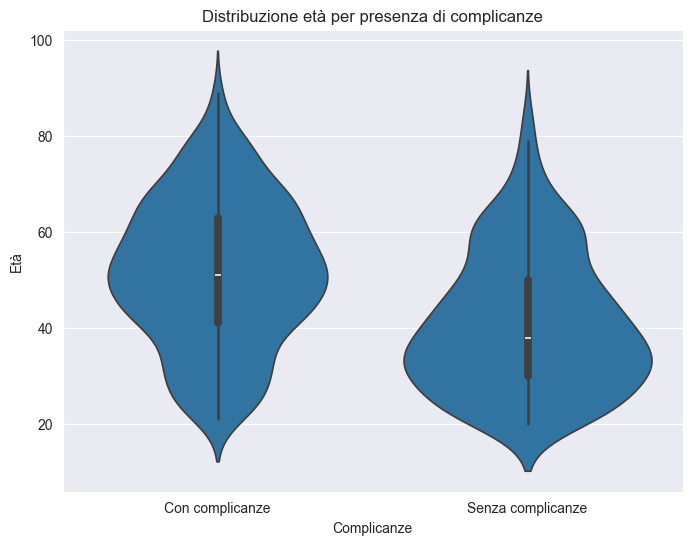

In [118]:
df = pd.read_csv('Excel/Parte1.csv')

df['Complicanze'] = df['Has_Diagnostics'].map({0: 'Senza complicanze', 1: 'Con complicanze'})

plt.figure(figsize=(8, 6))
sns.violinplot(x='Complicanze', y='Age', data=df)

plt.title('Distribuzione età per presenza di complicanze')
plt.xlabel('Complicanze')
plt.ylabel('Età')

plt.show()